Two class Training data accuracy : 
 98.4
Two class Testing data accuracy : 
 100.0
Four class Training data accuracy : 
 99.2
Four class Testing data accuracy : 
 100.0
Overall accuracy of training data : 
 98.8
Overall accuracy of training data : 
 100.0


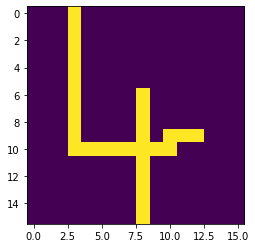

In [1]:
import numpy as np
from matplotlib import pyplot as plt


train_x= np.loadtxt("trainX.txt")
train_y= np.loadtxt("trainY.txt")
test_x= np.loadtxt("testX.txt")
test_y= np.loadtxt("testY.txt")

img = np.reshape(train_x[200],(16,16),order = 'F')
plt.imshow(img)


img = np.reshape(train_x[256],(16,16),order = 'F')
plt.imshow(img)



probTwo_1  = (np.sum(train_x[train_y==2],axis=0)+1)/(np.sum(train_y==2)+2)
probTwo_0=1-probTwo_1
probFour_1 = (np.sum(train_x[train_y==4],axis=0)+1)/(sum(train_y==4)+2)

probFour_0=1-probFour_1


def checkTwoOrFour(data):
    is_two  = np.product(probTwo_1 [data==1])*np.product(probTwo_0 [data==0])
    is_four = np.product(probFour_1[data==1])*np.product(probFour_0[data==0])
    if(is_two<is_four):
        return 4
    return 2




two_train_list=list(map(checkTwoOrFour, train_x[train_y==2]))
two_train_list_sum=np.sum(two_train_list==np.array(2))
accuray_two_training=two_train_list_sum/np.sum(train_y==2)
print("Two class Training data accuracy : \n",accuray_two_training*100)



two_test_list=list(map(checkTwoOrFour, test_x[test_y==2]))
two_test_list_sum=np.sum(two_test_list==np.array(2))
accuray_two_testing=two_test_list_sum/np.sum(test_y==2)
print("Two class Testing data accuracy : \n",accuray_two_testing*100)


four_train_list=list(map(checkTwoOrFour, train_x[train_y==4]))
four_train_list_sum=np.sum(four_train_list==np.array(4))
accuray_four_training=four_train_list_sum/np.sum(train_y==4)
print("Four class Training data accuracy : \n",accuray_four_training*100)


four_test_list=list(map(checkTwoOrFour, test_x[test_y==4]))
four_test_list_sum=np.sum(four_test_list==np.array(4))
accuray_four_testing=four_test_list_sum/np.sum(test_y==4)
print("Four class Testing data accuracy : \n",accuray_four_testing*100)



ovrall_two_trn=accuray_two_training*sum(train_y==2)*100
ovrall_four_trn=accuray_four_training*sum(train_y==4)*100
accuracy_overall_trn=(ovrall_two_trn+ovrall_four_trn)/train_y.shape[0]

print("Overall accuracy of training data : \n",accuracy_overall_trn)




ovrall_two_tst=accuray_two_testing*sum(train_y==2)*100
ovrall_four_tst=accuray_four_testing*sum(train_y==4)*100
accuracy_overall_tst=(ovrall_two_tst+ovrall_four_tst)/train_y.shape[0]

print("Overall accuracy of training data : \n",accuracy_overall_tst)